# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [2]:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_images(batch, axis):
    dy = batch['image'].shape[0]
    dx = batch['image'].shape[1]
    
    axis.imshow(batch['image'])
    
    colormap = {
        0: [0, 0, 0],
        1: [0, 0, 1],
        2: [0, 1, 0],
        4: [0, 1, 1],
        3: [1, 0, 0],
        5: [1, 0, 1],
        6: [1, 1, 0],
        7: [1, 1, 1],
    }
    
    for box, cl in zip(batch['groundtruth_boxes'], batch['groundtruth_classes']):
        #print(cl)
        
        y1 = int(box[0]*dy)
        x1 = int(box[1]*dx)
        y2 = int(box[2]*dy)
        x2 = int(box[3]*dx)
        
        rec = patches.Rectangle((x1,y1), x2-x1, y2-y1, facecolor='none', edgecolor=colormap[int(cl)])
        axis.add_patch(rec)

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

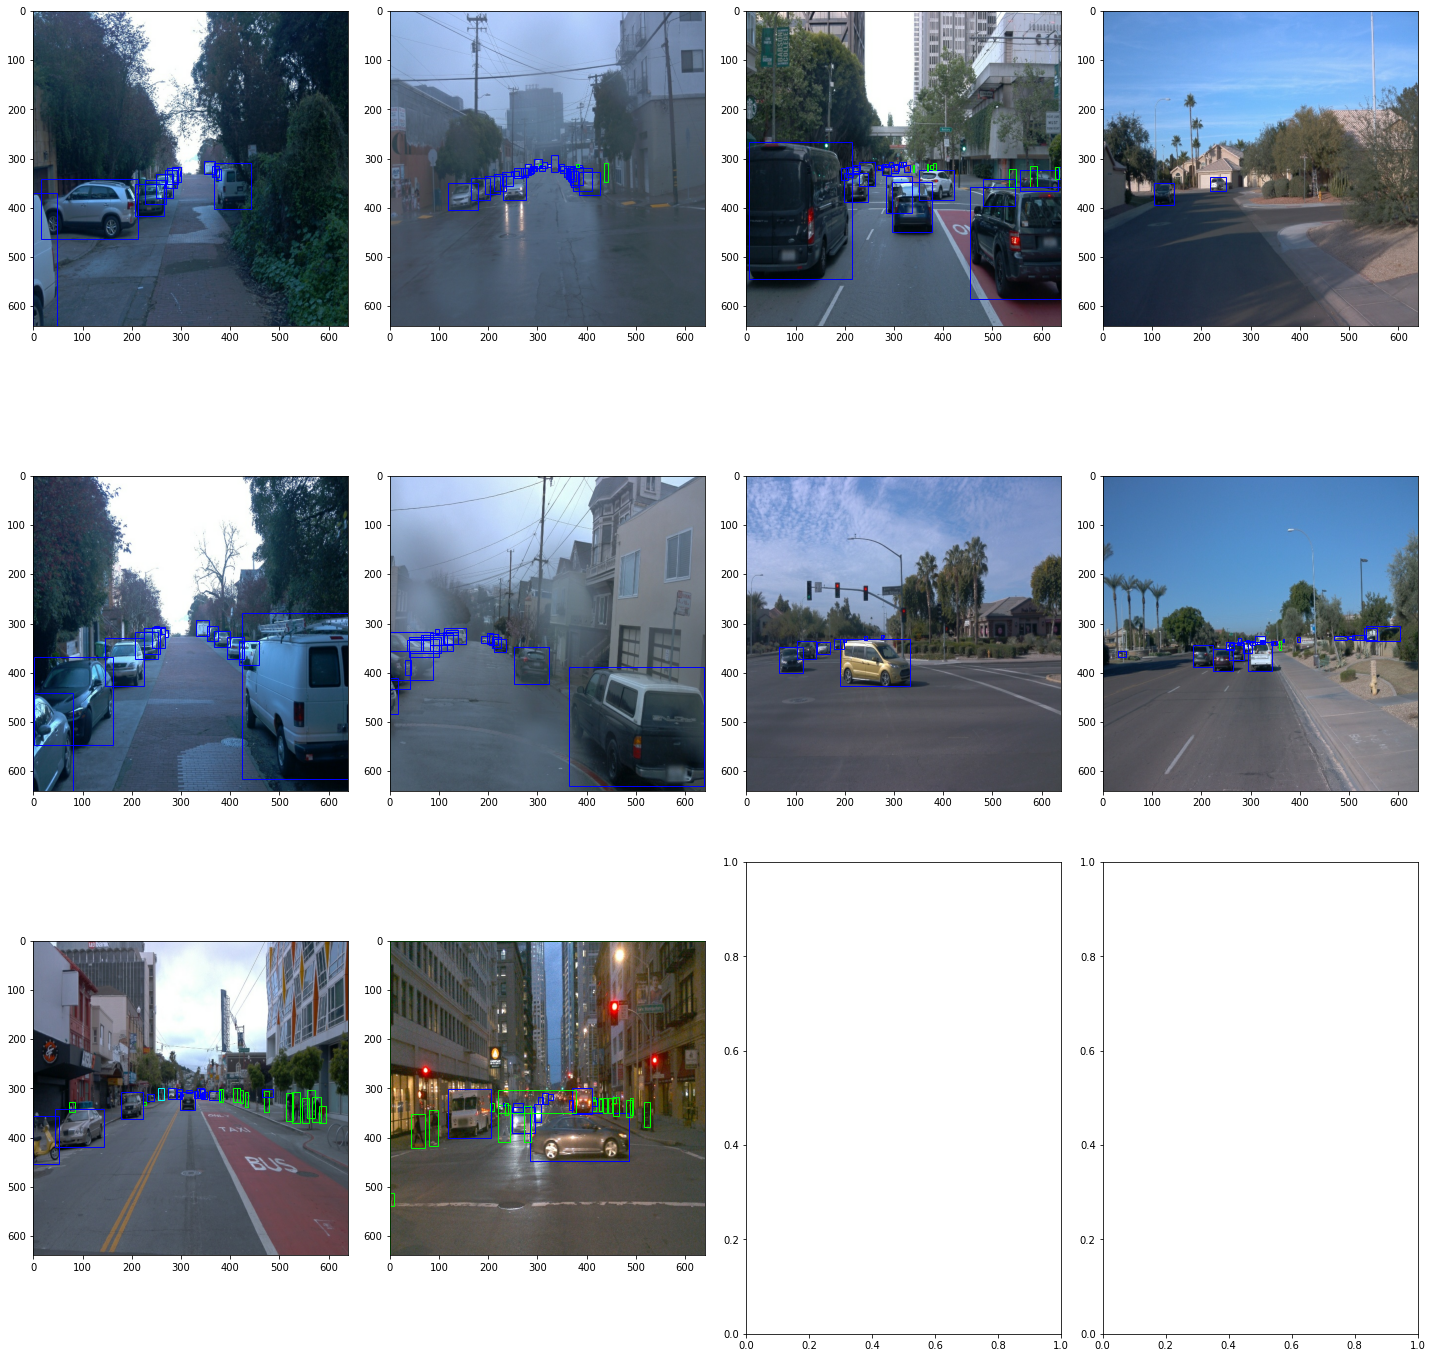

In [4]:
def shuffle_and_display(shuffle_size):
    # Display 10 random images in dataset
    dataset_2 = dataset.shuffle(shuffle_size)

    f, ax = plt.subplots(3, 4, figsize=(20,20))

    for i, batch in enumerate(dataset_2.take(10)):
        display_images(batch, ax[int(i/4), i%4])
    plt.tight_layout()
    plt.show()

shuffle_and_display(1)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [ ]:
# try different shuffle criteria
shuffle_and_display(1)
shuffle_and_display(2)
shuffle_and_display(3)


<DatasetV1Adapter shapes: {image: (None, None, 3), source_id: (), key: (), filename: (), groundtruth_image_confidences: (None,), groundtruth_verified_neg_classes: (None,), groundtruth_not_exhaustive_classes: (None,), groundtruth_boxes: (None, 4), groundtruth_area: (None,), groundtruth_is_crowd: (None,), groundtruth_difficult: (None,), groundtruth_group_of: (None,), groundtruth_weights: (None,), groundtruth_classes: (None,), groundtruth_image_classes: (None,), original_image_spatial_shape: (2,)}, types: {image: tf.uint8, source_id: tf.string, key: tf.string, filename: tf.string, groundtruth_image_confidences: tf.float32, groundtruth_verified_neg_classes: tf.int64, groundtruth_not_exhaustive_classes: tf.int64, groundtruth_boxes: tf.float32, groundtruth_area: tf.float32, groundtruth_is_crowd: tf.bool, groundtruth_difficult: tf.int64, groundtruth_group_of: tf.bool, groundtruth_weights: tf.float32, groundtruth_classes: tf.int64, groundtruth_image_classes: tf.int64, original_image_spatial_sh

Text(0, 0.5, 'Count [%]')

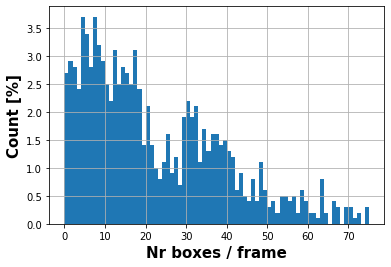

In [114]:
# explore batches
#dataset_3 = dataset
#dataset_2 = dataset.shuffle(1)
#batch = dataset_3.take(1000)

print(batch)
nr_boxes = [len(part['groundtruth_boxes']) for part in batch]
plt.hist(nr_boxes, weights=100*np.ones(len(nr_boxes)) / len(nr_boxes), bins = max(nr_boxes))

ax = plt.gca()
ax.grid('on')
plt.xlabel('Nr boxes / frame', fontweight ='bold', fontsize = 15)
plt.ylabel('Count [%]', fontweight ='bold', fontsize = 15)

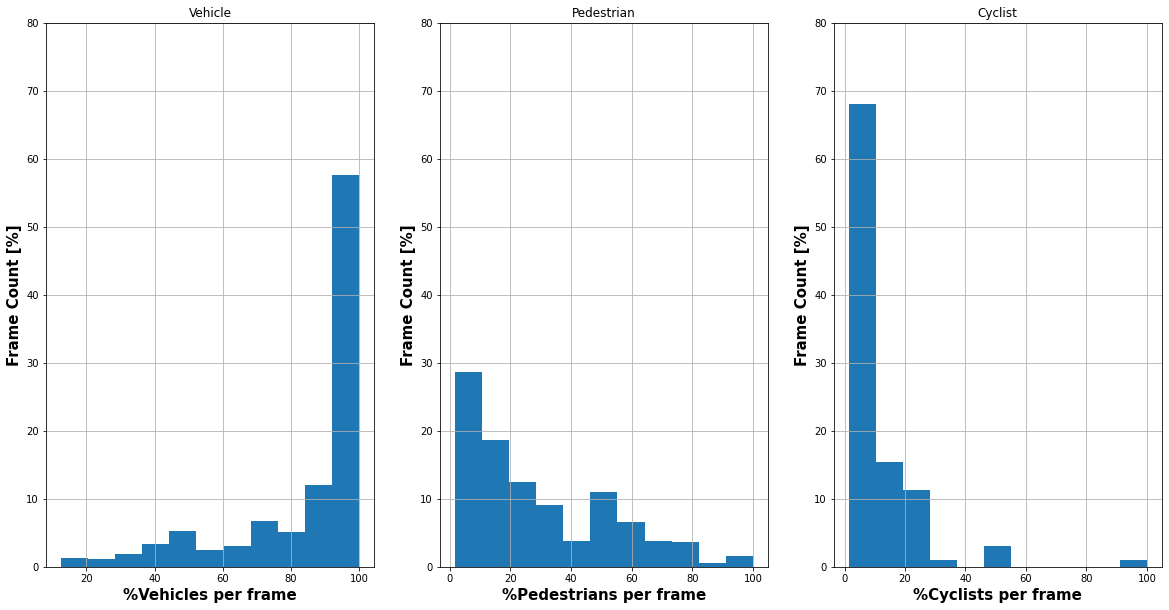

In [110]:

per = [[],[],[]]
dic = {
    1 : 0,
    2 : 1,
    4 : 2    
}
for frame in batch:
    #print(part['groundtruth_classes'])
    ar_unique, i = np.unique(frame['groundtruth_classes'], return_counts=True)#
    # display the returned array
    #print("Unique values:", ar_unique)
    
    for idx,un in enumerate(ar_unique):
        #print(un, idx)
        per[dic[un]].append(i[idx]/sum(i))
    
fig, ax = plt.subplots(1,3, figsize=(20,10))
#print(per)
ax[0].hist(100*np.array(per[0]), weights=100*np.ones(len(per[0])) / len(per[0]), bins = 11)
ax[0].set_title("Vehicle")
ax[1].hist(100*np.array(per[1]), weights=100*np.ones(len(per[1])) / len(per[1]), bins = 11)
ax[1].set_title("Pedestrian")
ax[2].hist(100*np.array(per[2]), weights=100*np.ones(len(per[2])) / len(per[2]), bins = 11)
ax[2].set_title("Cyclist")
ax[0].set_ylim([0, 80])
ax[1].set_ylim([0, 80])
ax[2].set_ylim([0, 80])
ax[0].set_xlabel('%Vehicles per frame', fontweight ='bold', fontsize = 15)
ax[0].set_ylabel('Frame Count [%]', fontweight ='bold', fontsize = 15)
ax[1].set_xlabel('%Pedestrians per frame', fontweight ='bold', fontsize = 15)
ax[1].set_ylabel('Frame Count [%]', fontweight ='bold', fontsize = 15)
ax[2].set_xlabel('%Cyclists per frame', fontweight ='bold', fontsize = 15)
ax[2].set_ylabel('Frame Count [%]', fontweight ='bold', fontsize = 15)
ax[0].grid('on')
ax[1].grid('on')
ax[2].grid('on')
    # display the counts
    #for classes in frame['groundtruth_classes']:
    #    print(classes)
#nr_classes = [len(tf.unique(part['groundtruth_classes'])) for part in batch]
#plt.hist(nr_classes, bins=5)
#plt.title("Nr classes / frame")


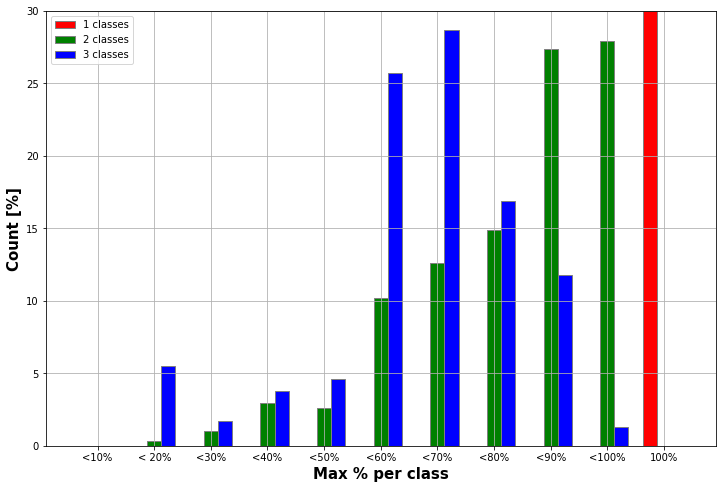

In [96]:
import math

per = np.array([[0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0]])


for frame in batch:
    #print(part['groundtruth_classes'])
    ar_unique, i = np.unique(frame['groundtruth_classes'], return_counts=True)
    # display the returned array
    #print("Unique values:", ar_unique)
    
    max_ = []
    for idx,un in enumerate(ar_unique):
         #print(un, idx)
        max_.append(i[idx]/sum(i))
        idx = math.floor(max(max_)*10)
        
        per[len(ar_unique)-1][idx] = per[len(ar_unique)-1][idx] +1

fig, ax = plt.subplots(figsize =(12, 8))
 
barWidth = 0.25
 
# Set position of bar on X axis
br1 = np.arange(len(per[0]))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, 100*per[0]/sum(per[0]), color ='r', width = barWidth,
        edgecolor ='grey', label ='1 classes')
plt.bar(br2, 100*per[1]/sum(per[1]), color ='g', width = barWidth,
        edgecolor ='grey', label ='2 classes')
plt.bar(br3, 100*per[2]/sum(per[2]), color ='b', width = barWidth,
        edgecolor ='grey', label ='3 classes')
 
# Adding Xticks
plt.ylim([0, 30])
plt.xlabel('Max % per class', fontweight ='bold', fontsize = 15)
plt.ylabel('Count [%]', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(per[0]))],
        ['<10%', '< 20%', '<30%','<40%','<50%', '<60%', '<70%', '<80%', '<90%', '<100%', '100%'])
 
ax.legend()
ax.grid('on')

Text(0.5, 0, '# Classes/Frame [#]')

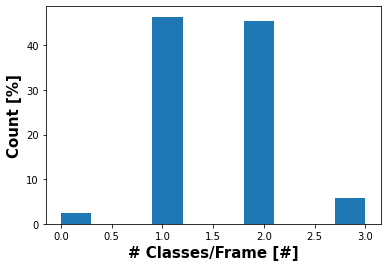

In [99]:

uniques = [len(np.unique(frame['groundtruth_classes'])) for frame in batch]
plt.hist(uniques, weights=100*np.ones(len(uniques)) / len(uniques))
plt.ylabel('Count [%]', fontweight ='bold', fontsize = 15)
plt.xlabel('# Classes/Frame [#]', fontweight ='bold', fontsize = 15)






(array([ 1.7,  0. ,  0. , 47.4,  0. ,  0. , 44.3,  0. ,  0. ,  6.6]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

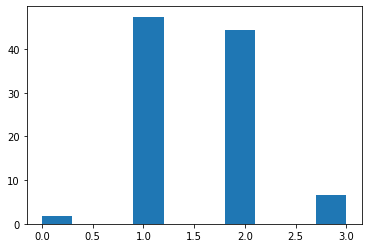

In [80]:
uniques



[3,
 2,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 3,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 3,
 1,
 0,
 1,
 2,
 1,
 2,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 2,
 0,
 1,
 3,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 2,
 1,
 3,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 3,
 2,
 1,
 1,
 2,
 3,
 2,
 3,
 2,
 1,
 2,
